# **Simple Linear Regression**

Before jumping into the implementation and the programming part, first of all let's understand what linear regression is and why do we use it?

Linear Regression : It shows linear relationship between a dependent variable and one or more independent variable. 

Important points that you should remember : 

1. It makes predictions for real/continuous or numeric variables such as sales, age, price etc.
2. We finds out how the value of dependent variable(y) changes according to the value of independent variable(x). 
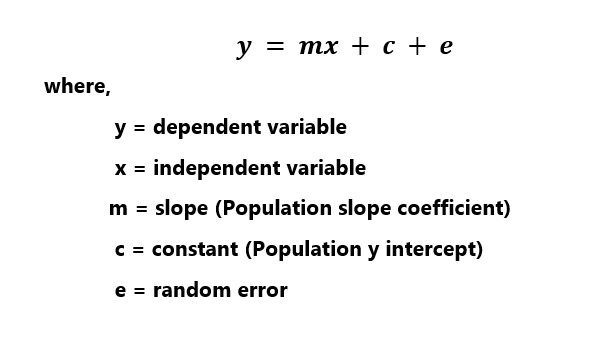

You might be wondering what the term random error means. Don't worry I have made it easier for you.<br>  
Random error :  It is the difference between the predicted value of y for x and the observed value of y for x. 

Now, we  have to find the value of 'm' and 'c' to make predictions from our regression line. 
So, for that we have : 

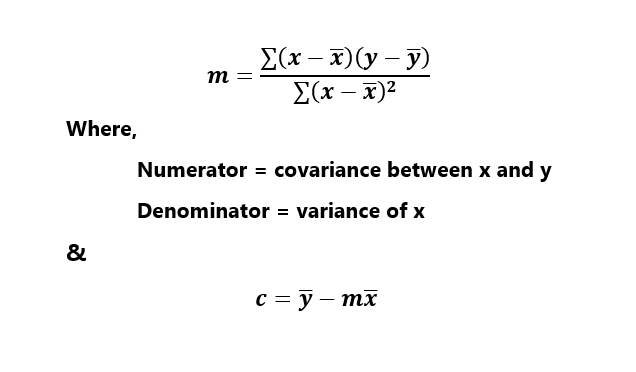

Let's get into the coding part!

# **1. Performing mathematically** 

In [1]:
#importing required libraries 

from sklearn.datasets import make_regression   #for creating a regression data set 
import numpy as np 
import matplotlib.pyplot as plt   #for plotting graphs 

In [2]:
#generating our data set using make_regression() func. 
x,y = make_regression(100, 1, shuffle = True, bias = 0.0, noise = 0, random_state=2)
#100 : number of samples 
#1 : dimensionality 

In [3]:
#shape of x 
x.shape

(100, 1)

In [4]:
#shape of y
y.shape

(100,)

In [5]:
#max and min values of x
print(np.max(x))
print(np.min(x))

2.2922080128149576
-2.6594494563834883


In [6]:
#max and min values of y
print(np.max(y))
print(np.min(y))

139.46759894551576
-161.81211658154356


In [7]:
#mean of x  
mean_x = np.mean(x)
mean_x

#mean_x = sum(x)/len(x)   #another way

-0.10374113388259777

In [8]:
#mean of y 
mean_y = np.mean(y)
mean_y

# mean_y = sum(y)/len(y)  #another way

-6.3120479352670325

In [9]:
#since our x is 2 dimensional and y is 1 dimensional. Let's flatten x to 1 dimension
x = np.ravel(x)
x.shape

(100,)

In [10]:
#let's find out our m (slope)
#Whenever stuck, please refer to the formula provided above :)

m = sum((x - mean_x)*(y - mean_y))/sum((x - mean_x)**2)
m

60.84421578050493

In [11]:
#determining c

c = mean_y - mean_x*m
c

-1.7763568394002505e-15

We have determined our 'm' and 'c'. From both these values, we can predict the value of y for some value of x. 

In [12]:
#let the value of x be 2.9
X = 2.9 
#Y = mx + c
Y = m*X + c
Y   #our predicted value of y

176.4482257634643

# **2. Performing on a dataset**

In [13]:
#importing the required libraries 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
#importing our dataset 
df = pd.read_csv('../input/diamonds/diamonds.csv')
df.head()    #Returns the first 5 rows of the dataframe

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [15]:
#our independent variable
X = df[['carat']]
X

,carat
0,0.23
1,0.21
2,0.23
3,0.29
4,0.31
...,...
53935,0.72
53936,0.72
53937,0.70
53938,0.86


In [16]:
#if you want to use more attributes for regression you can perform this way 
#X = df[['carat','depth','table']] 

#Note : these attributes have numerical value

In [17]:
#dependent variable 
Y = df['price']
Y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [18]:
#splitting our data set into training and testing set

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32364, 1)
(21576, 1)
(32364,)
(21576,)


In [19]:
#training our model using training data set
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [20]:
#Now after training, it's time to make predictions using our testing data set
predictions = model.predict(X_test)
predictions

array([  846.24485048,  3253.43303694,   302.68622772, ...,
         923.8960823 ,  9465.53158267, 13348.09317375])

# **3. Regression With Categorical Variables**

What if you want to include the categorical variables for prediction?<br>
Simple answer is that you have to assign those variables a numerical value

In [21]:
#let make a temporary Dataframe with categorical variables 
temp = df[['cut','color','clarity']]
temp

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


In [22]:
#Let's convert them into numerical values 
temp = pd.get_dummies(data=temp)
temp

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53936,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53937,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53938,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


You're good to go with performing regression on data sets!
<br>
Reviews and edits are always welcome. Let's share and grow :)